### 3. Pathway Enrichment Analysis
- Extracting Biological Insights from top important features of subtypes

In [1]:
import requests 
import json
import pandas as pd 

def identifiers(ids='EGF,EGFR', interactors=False, page_size='1', page='1', species='Homo Sapiens',
                sort_by='ENTITIES_FDR', order='ASC', resource='TOTAL', p_value='1', include_disease=True,
                min_entities=None, max_entities=None, projection=False, importable_only=False):
    """
    Given a list of protein, gene, or small molecule identifiers conducts reactome pathway enrichment analysis.

    :param ids: comma seperated list of proteins, genes or small molecules identifiers symbol in string format ex. 'EGF,EGFR'
    :param interactors: boolean value indicating include interations
    :param page_size: page size
    :param page: number of pages
    :param species: list of species to filter the result (accepts taxonomy ids, species names and dbId)
    :param sort_by: how to sort the result. Available filters: TOTAL_ENTITIES, TOTAL_REACTIONS, TOTAL_INTERACTIONS,
        FOUND_ENTITIES, FOUND_INTERACTIONS, FOUND_REACTIONS, ENTITIES_RATIO, ENTITIES_PVALUE, ENTITIES_FDR, REACTIONS_RATIO
    :param order: order ASC or DESC
    :param resource: the resource to sort TOTAL, UNIPORT, ENSEMBLE, CHEMBI, IUPHAR, MIRBASE, NCBI_PROTEIN, EMBL, COMPOUND, PUBCEM_COMPOUND
    :param p_value: defines the pValue threshold. Only hit pathway with pValue equals or below the threshold will be returned
    :param include_disease: set to ‘false’ to exclude the disease pathways from the result (it does not alter the statistics)
    :param projection: if true, projects the identifiers to human and only shows the result in this species
    :param max_entities: maximum number of contained entities per pathway (takes into account the resource)
    :param min_entities: minimum number of contained entities per pathway (takes into account the resource)
    :return: Json dictionary object
    """

    if isinstance(page_size, NumberTypes):
        page_size = str(page_size)

    if isinstance(page, NumberTypes):
        page = str(page)

    if isinstance(p_value, NumberTypes):
        p_value = str(p_value)

    if isinstance(min_entities, NumberTypes):
        min_entities = str(min_entities)

    if isinstance(max_entities, NumberTypes):
        max_entities = str(max_entities)

    if interactors:
        interactors = 'true'
    else:
        interactors = 'false'

    if include_disease:
        include_disease = 'true'
    else:
        include_disease = 'false'

    headers = {
        'accept': 'application/json',
        'content-type': 'text/plain',
    }

    params = (
        ('interactors', interactors),
        ('pageSize', page_size),
        ('page', page),
        ('sortBy', sort_by),
        ('order', order),
        ('species',  species),
        ('resource', resource),
        ('pValue', p_value),
        ('includeDisease', include_disease),
        ('min', min_entities),
        ('max', max_entities),
        ('importableOnly', importable_only)
    )

    if projection:
        url = 'https://reactome.org/AnalysisService/identifiers/projection'
    else:
        url = 'https://reactome.org/AnalysisService/identifiers/'

    data = ids

    try:
        response = requests.post(url=url, headers=headers, params=params, data=data)
    except ConnectionError as e:
        print(e)

    if response.status_code == 200:
        return response.json()
    else:
        print('Status code returned a value of %s' % response.status_code)

def token(token, species='Homo sapiens', page_size='1', page='1', sort_by='ENTITIES_FDR', order='ASC', resource='TOTAL',
          p_value='1', include_disease=True, min_entities=None, max_entities=None):
    """
    Returns the result associated with token.
    Use page and pageSize to reduce the amount of data retrieved. Use sortBy and order to sort the result by your preferred option.
    The resource field will filter the results to show only those corresponding to the preferred molecule type (TOTAL includes all the different molecules type)

    :param token: The token associated with the data result - analysis Web-Service is token based, so for every analysis
        request a TOKEN is associated to the result
    :param species: List of species to filter the result (accepts taxonomy ids, species names and reactome dbId)
    :param page_size: Page size
    :param page: Page number
    :param sort_by: How to sort the result. Available filters: TOTAL_ENTITIES, TOTAL_REACTIONS, TOTAL_INTERACTIONS,
        FOUND_ENTITIES, FOUND_INTERACTIONS, FOUND_REACTIONS, ENTITIES_RATIO, ENTITIES_PVALUE, ENTITIES_FDR, REACTIONS_RATIO
    :param order: Order ASC or DESC
    :param resource: The resource to sort TOTAL, UNIPORT, ENSEMBLE, CHEMBI, IUPHAR, MIRBASE, NCBI_PROTEIN, EMBL, COMPOUND, PUBCEM_COMPOUND
    :param p_value: Defines the pValue threshold. Only hit pathway with pValue equals or below the threshold will be returned
    :param include_disease: Set to ‘false’ to exclude the disease pathways from the result (it does not alter the statistics)
    :param min_entities: Minimum number of contained entities per pathway (takes into account the resource)
    :param max_entities: Maximum number of contained entities per pathway (takes into account the resource)
    :return: Json dictionary object
    """

    if isinstance(page_size, NumberTypes):
        page_size = str(page_size)

    if isinstance(page, NumberTypes):
        page = str(page)

    if isinstance(p_value, NumberTypes):
        p_value = str(p_value)

    if isinstance(min_entities, NumberTypes):
        min_entities = str(min_entities)

    if isinstance(max_entities, NumberTypes):
        max_entities = str(max_entities)

    if include_disease:
        include_disease = 'true'
    else:
        include_disease = 'false'

    headers = {
        'accept': 'application/json',
    }

    params = (
        ('pageSize', page_size),
        ('page', page),
        ('sortBy', sort_by),
        ('order', order),
        ('species',  species),
        ('resource', resource),
        ('pValue', p_value),
        ('includeDisease', include_disease),
        ('min', min_entities),
        ('max', max_entities),
    )

    url = 'https://reactome.org/AnalysisService/token/%s' % token

    try:
        response = requests.get(url=url, headers=headers, params=params)
    except ConnectionError as e:
        print(e)

    if response.status_code == 200:
        return response.json()
    else:
        print('Status code returned a value of %s' % response.status_code)


def report(token, path, file='report.pdf', number='25', resource='TOTAL', diagram_profile='Modern', analysis_profile='Standard',
                fireworks_profile='Barium Lithium', species='Homo sapiens', chunk_size=128):
    """
    Downloads a report for a given pathway analysis result

    :param token: The token associated with the data result - analysis Web-Service is token based, so for every analysis
        request a TOKEN is associated to the result
    :param path: Absolute path to save the report pdf file to
    :param file: Pdf file name to save the analysis report to - default set to report.pdf
    :param number: Number of pathways reported (max 50)
    :param resource: The resource to sort TOTAL, UNIPORT, ENSEMBLE, CHEMBI, IUPHAR, MIRBASE, NCBI_PROTEIN, EMBL, COMPOUND, PUBCEM_COMPOUND
    :param diagram_profile: Diagram Color Profile - as string
    :param analysis_profile: Analysis Color Profile - as string
    :param fireworks_profile: Diagram Color Profile - as string
    :param species: The species for which results will be reported
    :param chunk_size: Python generator iter_content() chunk size - default set to 128
    :return: Saves a reactome analysis pdf report to the indicated path and file name
    """

    if isinstance(number, NumberTypes):
        number = str(number)

    headers = {
        'accept': 'application/pdf',
    }

    params = (
        ('number', number),
        ('resource', resource),
        ('diagramProfile', diagram_profile),
        ('analysisProfile', analysis_profile),
        ('fireworksProfile', fireworks_profile),
    )

    try:
        response = requests.get('https://reactome.org/AnalysisService/report/%s/%s/%s' % (token, species, file),
                                headers=headers, params=params)
    except ConnectionError as e:
        print(e)

    if response.status_code == 200:
        with open("".join([path, file]), 'wb') as f:
            for chunk in response.iter_content(chunk_size=chunk_size):
                f.write(chunk)
    else:
        print('Status code returned a value of %s' % response.status_code)

NumberTypes = (int, float, complex)


TCGA-BRCA Basal subtype features pathway enrichment analysis: 
 Empty DataFrame
Columns: [Pathway name, pValue, FDR]
Index: []


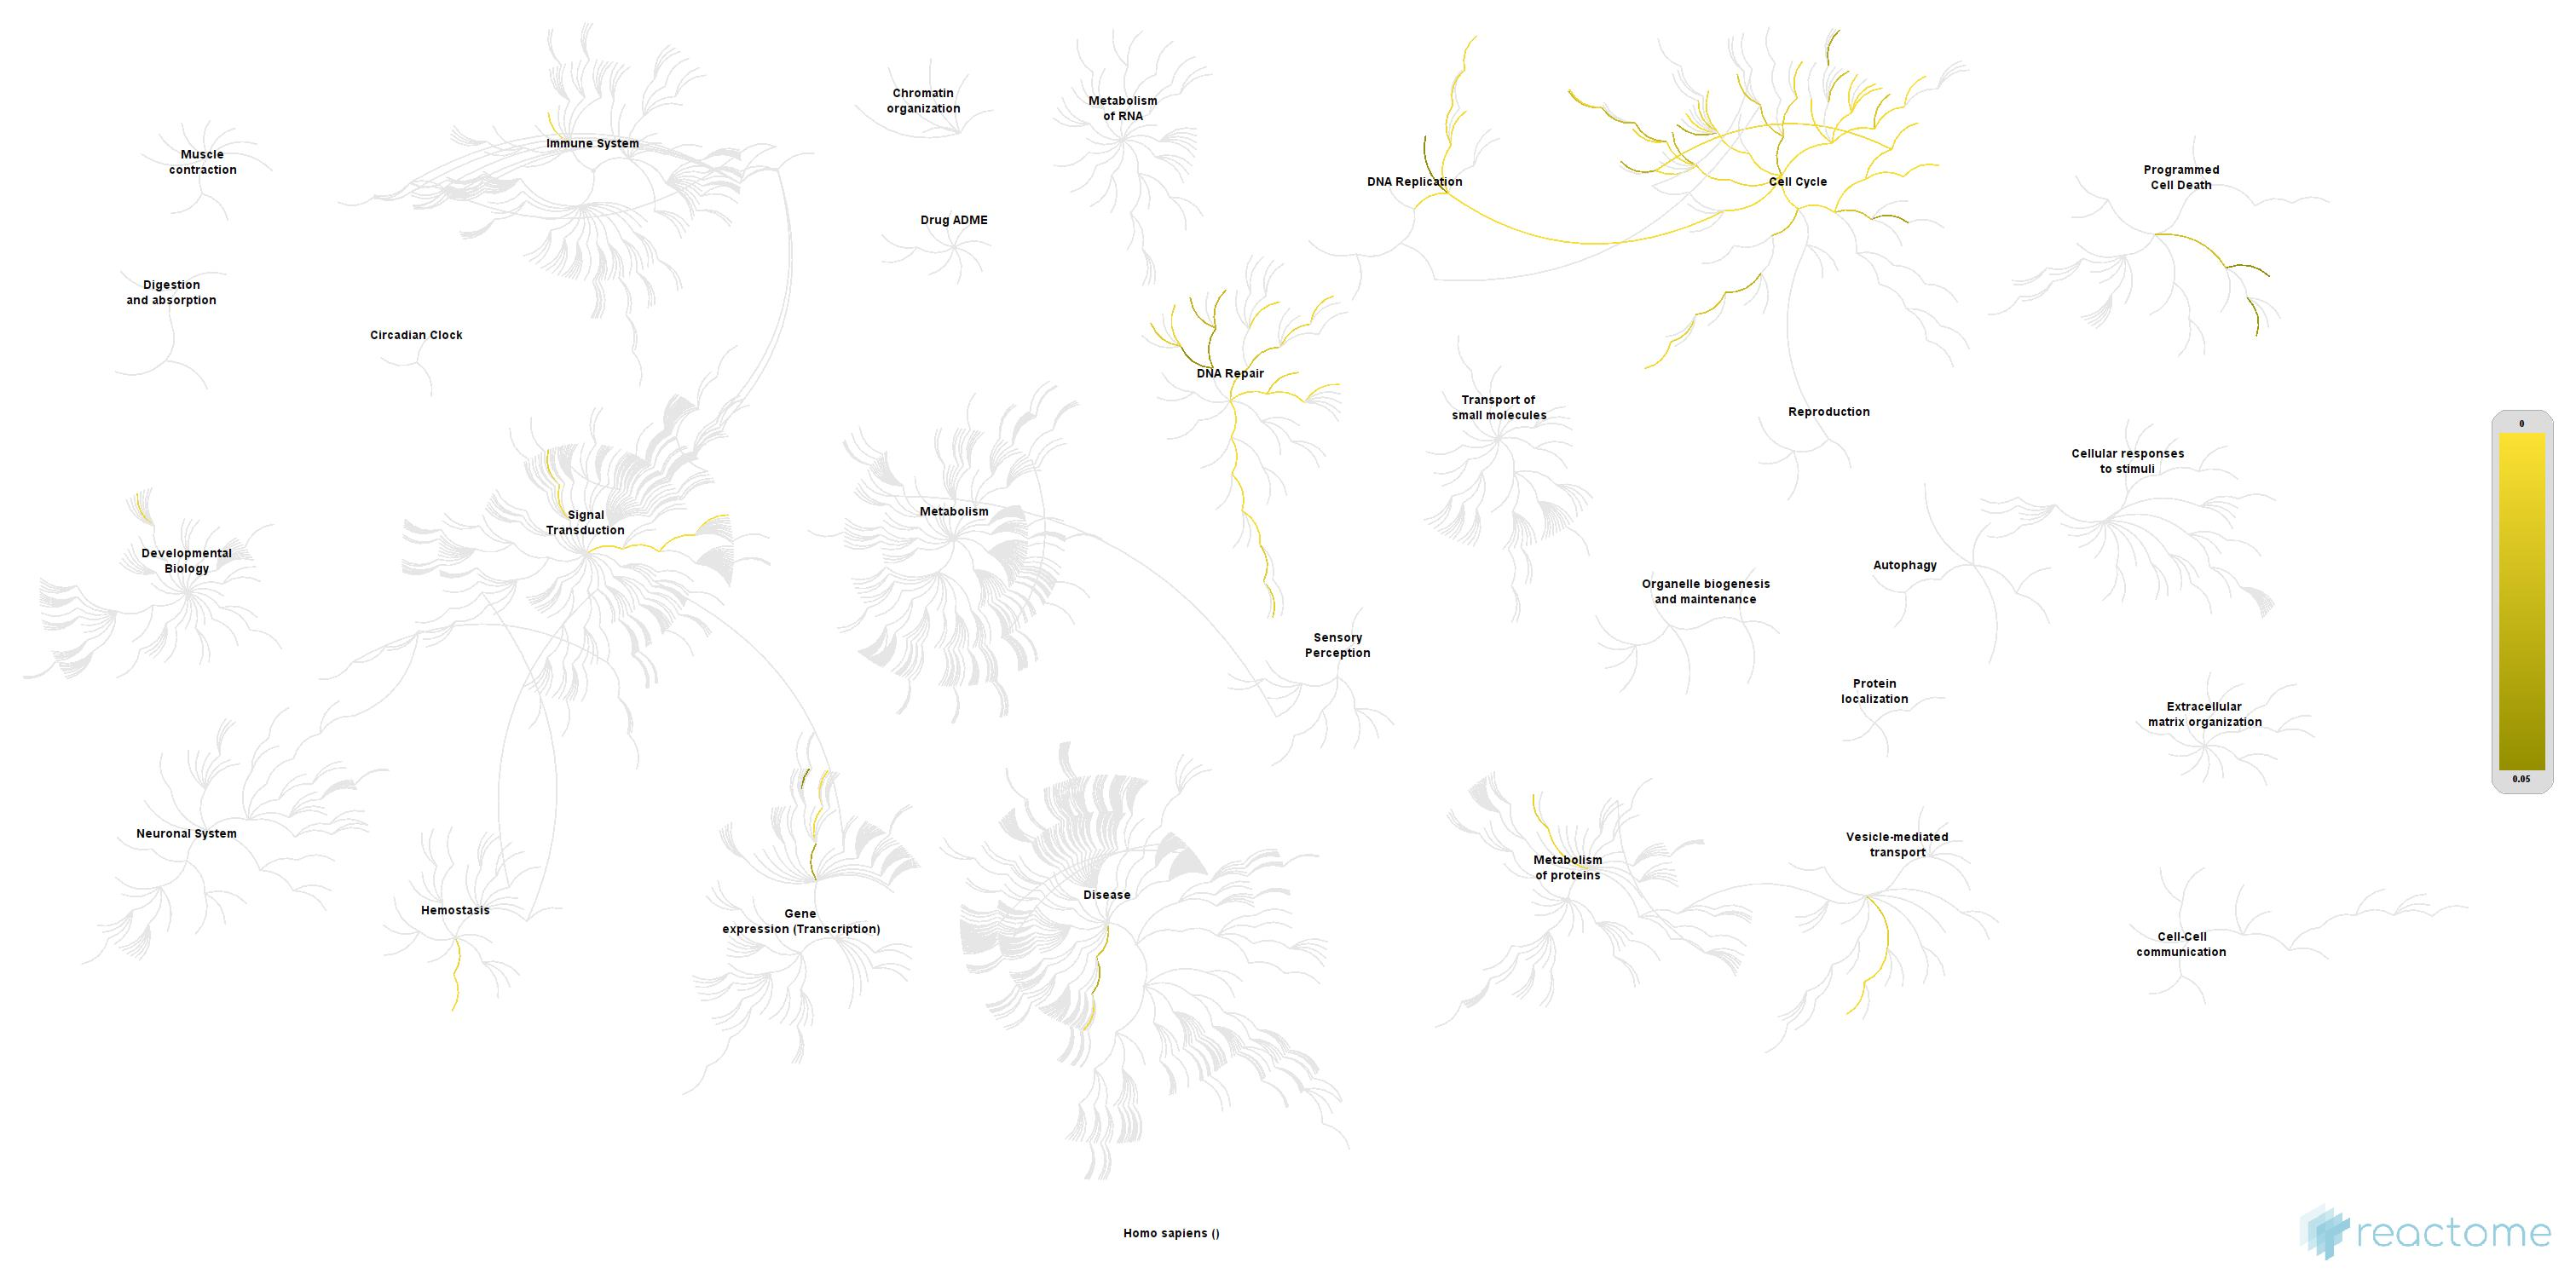

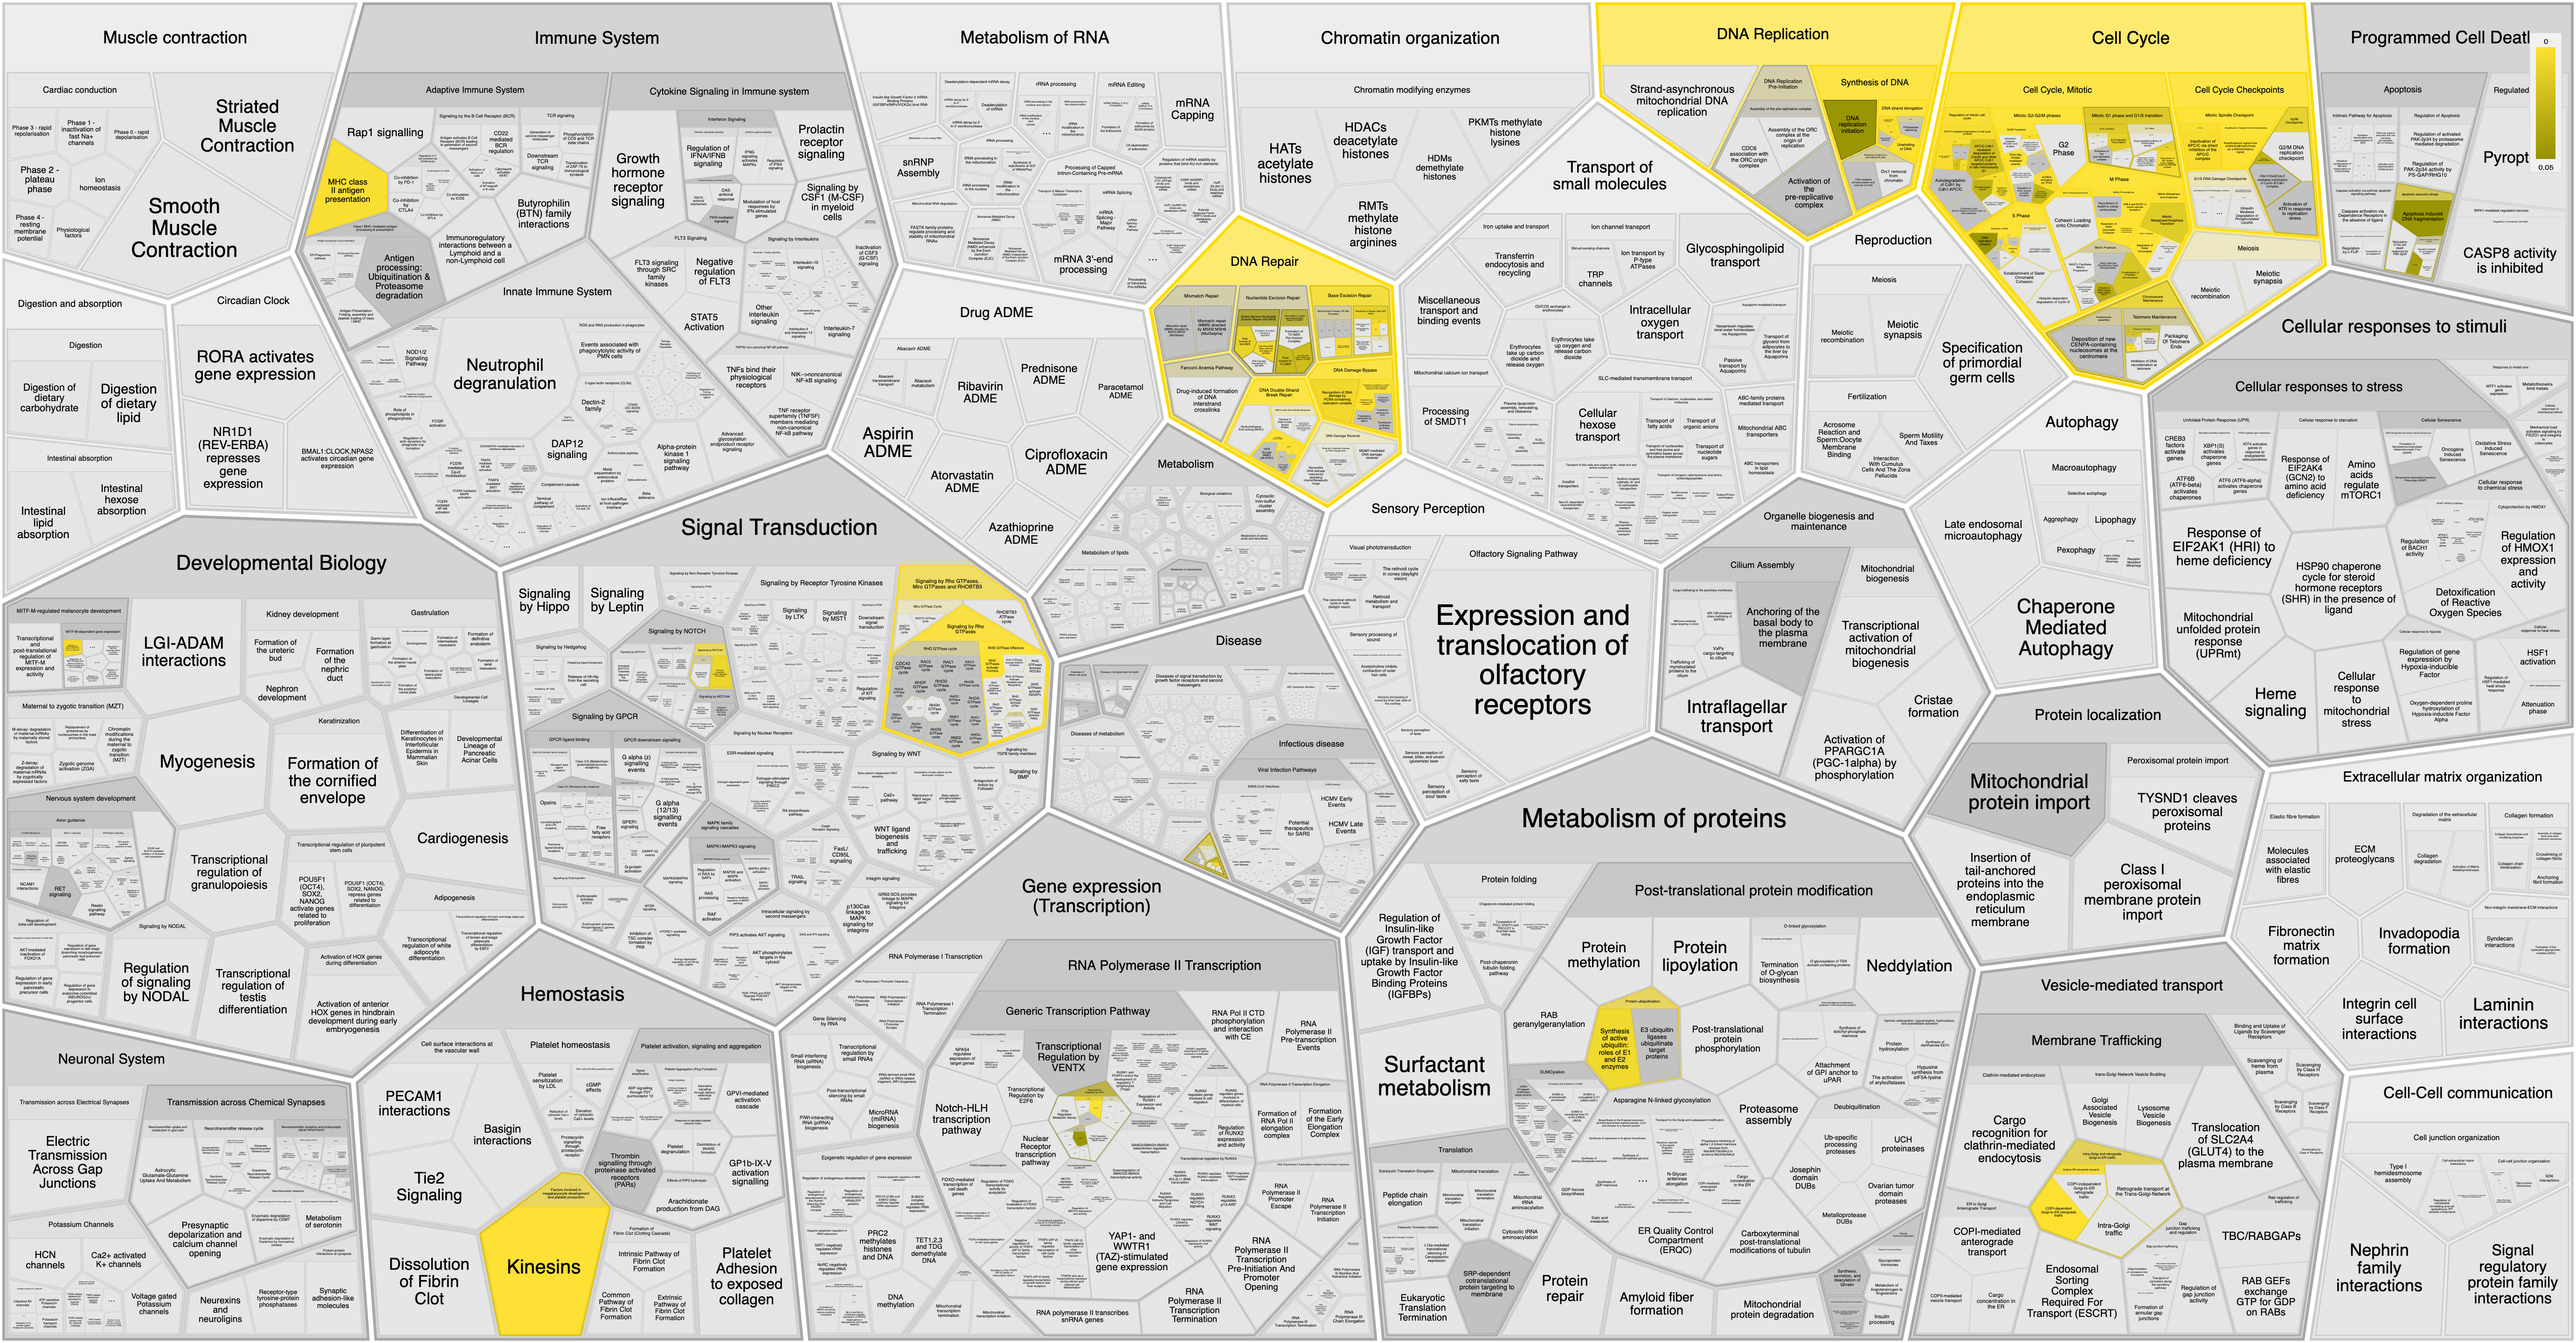

In [18]:
from IPython.display import display, Image

input_filename = "../data/selected_features_by_subtype.json"
with open(input_filename, "r") as f:
    selected_features = json.load(f)

subtype_of_interest = 'Basal'
_ids = ",".join(selected_features[subtype_of_interest]) # comma seperated list of gene features in string... 

result = identifiers(ids=_ids, interactors=False, page_size='1', page='1', species='Homo Sapiens',
                sort_by='ENTITIES_FDR', order='ASC', resource='TOTAL', p_value='0.05', include_disease=True,
                min_entities=None, max_entities=None, projection=False)

_token = result['summary']['token']

token_result = token(_token, species='Homo sapiens', page_size='-1', page='-1', sort_by='ENTITIES_FDR',
                                      order='ASC', resource='TOTAL', p_value='0.05', include_disease=False,
                                      min_entities=None, max_entities=None)

enrichment_analysis = [p for p in token_result['pathways']]
_names = [(e['name'], e['entities']['pValue'], e['entities']['fdr']) for e in enrichment_analysis if e['entities']['fdr'] < 0.05]

df = pd.DataFrame(_names, columns=['Pathway name', 'pValue', 'FDR'])
df = df.sort_values(by='FDR', ascending=True)
print("\nTCGA-BRCA Basal subtype features pathway enrichment analysis: \n", df)

x = Image("../img/graph.jpg") 
y = Image("../img/Reacfoam.jpg") 
display(x, y) 

In [12]:
enrichment_analysis

[{'stId': 'R-HSA-141444',
  'dbId': 141444,
  'name': 'Amplification  of signal from unattached  kinetochores via a MAD2  inhibitory signal',
  'species': {'dbId': 48887, 'taxId': '9606', 'name': 'Homo sapiens'},
  'llp': True,
  'entities': {'resource': 'TOTAL',
   'total': 94,
   'found': 4,
   'ratio': 0.0059606848446417246,
   'pValue': 0.01981655310865993,
   'fdr': 0.5763210648705329,
   'exp': []},
  'reactions': {'resource': 'TOTAL',
   'total': 4,
   'found': 4,
   'ratio': 0.00026210602188585284},
  'inDisease': False},
 {'stId': 'R-HSA-141424',
  'dbId': 141424,
  'name': 'Amplification of signal from the kinetochores',
  'species': {'dbId': 48887, 'taxId': '9606', 'name': 'Homo sapiens'},
  'llp': False,
  'entities': {'resource': 'TOTAL',
   'total': 94,
   'found': 4,
   'ratio': 0.0059606848446417246,
   'pValue': 0.01981655310865993,
   'fdr': 0.5763210648705329,
   'exp': []},
  'reactions': {'resource': 'TOTAL',
   'total': 4,
   'found': 4,
   'ratio': 0.000262106021